In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import aqml.cheminfo.lo.dmb as clb
import aqml.cheminfo.lo.rotate as clr
import aqml.cheminfo.lo.dmml as cll
import numpy as np
from aqml.cheminfo.lo.dmml import *
from aqml.cheminfo.lo.dmx import *
import aqml.cheminfo.molecule.core as cmr
import ase.io as aio
np.set_printoptions(precision=4,suppress=True)

In [2]:
#from importlib import reload
reload(clb); reload(clr); reload(cll); reload(cmr)

<module 'cheminfo.molecule.core' from '/home/bing/Dropbox/workspace/python/cheminfo/molecule/core.pyc'>

In [3]:
# check rotational indenpendence
#fs = ['test-h2o/'+si+'_optg.xyz' for si in ['01','01'] ] #'c07h16', 'c08h18',
#angles = [0., 60]
#t1,t2 = clb.ready_pyscf(fs,rotate_angles=angles)
#print clb.get_dm_aa(t1,0,1).T-clb.get_dm_aa(t2,0,1).T
#print clb.get_dm_aa(t1,0,2).T-clb.get_dm_aa(t2,0,2).T

In [4]:
def show_dm(o0,o1,b0,b1,idx,iprt=False):
    dm1 = clb.get_dm_aa(o0,b0[0],b0[1])
    dm2 = clb.get_dm_aa(o1,b1[0],b1[1])
    if iprt:
        print(dm1.T)
        print(dm2.T)
    print( (dm2[idx]-dm1).T )

In [5]:
fs = ['test-h2o/'+si+'_optg.xyz' for si in ['10'] ] #,'10'] ] #'c07h16', 'c08h18',
o1  = clb.ready_pyscf(fs)


(' now ', 'test-h2o/10_optg.xyz')
 ## found 30 non-covalent bonds
converged SCF energy = -753.108756898079


In [24]:
o0 = o1[0]

In [6]:
import imolecule
imolecule.draw(fs[0])

In [7]:
ls test-h2o/

01_optg.xyz  03_optg.xyz  05_optg.xyz  07_optg.xyz  10_optg.xyz
02_optg.xyz  04_optg.xyz  06_optg.xyz  10_g7/


In [7]:
fs = ['test-h2o/'+si+'_optg.xyz' for si in ['02','03','04','05','06','07'] ] #'c07h16', 'c08h18',
o2,o3,o4,o5,o6,o7 = clb.ready_pyscf(fs)


(' now ', 'test-h2o/02_optg.xyz')
 ## found 2 non-covalent bonds
converged SCF energy = -150.567106603784
(' now ', 'test-h2o/03_optg.xyz')
 ## found 6 non-covalent bonds
converged SCF energy = -225.878926025643
(' now ', 'test-h2o/04_optg.xyz')
 ## found 8 non-covalent bonds
converged SCF energy = -301.207272352727
(' now ', 'test-h2o/05_optg.xyz')
 ## found 10 non-covalent bonds
converged SCF energy = -376.518289526378
(' now ', 'test-h2o/06_optg.xyz')
 ## found 12 non-covalent bonds
converged SCF energy = -451.825330743926
(' now ', 'test-h2o/07_optg.xyz')
 ## found 20 non-covalent bonds
converged SCF energy = -527.138651108202


In [9]:
b0 = [0,1]; b1 = [0,1]; idx=[0,1,2,3,4]; #show_dm(o0,o1,b0,b1,idx)
b0 = [0,2]; b1 = [0,2]; idx=[0,1,2,3,4]; #show_dm(o0,o1,b0,b1,idx)

In [185]:
import aqml.cheminfo.molecule.core as clc
import ase.visualize as av
from aqml.cheminfo.molecule.core import *
import aqml.cheminfo.lo.dmb as clb
import ase.io as aio
reload(clb); reload(clc); reload(clr)

<module 'cheminfo.lo.rotate' from '/home/bing/Dropbox/workspace/python/cheminfo/lo/rotate.pyc'>

In [186]:
fs1 = ['test-h2o/07_optg.xyz', 'test-h2o/10_optg.xyz']
br,bq = [6,8], [0,1]

mr = aio.read(fs1[0])
omr = RawMol(mr.numbers, mr.positions)
mrb, g1 = clb.retrieve_bond_env(br, omr, iPL='1,2')
av.view(mrb)

mq = aio.read(fs1[1])
omq = RawMol(mq.numbers, mq.positions)
mqb, g2 = clb.retrieve_bond_env(bq, omq, iPL='1,2')
av.view(mqb)


 ## found 10 non-covalent bonds
 ## found 15 non-covalent bonds


In [187]:
fs1 = ['test-h2o/07_optg.xyz', 'test-h2o/10_optg.xyz']
objs1 = [o7, o0]
br,bq = [6,8], [0,1]
clb.test(fs1,objs1,br,bq,debug=True)

 ## found 10 non-covalent bonds
 ## found 15 non-covalent bonds
('n1=', 6)
('dsx=', [3.080674606044602, 3.208323530345874, 4.282809038580821, 4.413175327743218, 4.867374382796842, 4.870091747657968, 4.4727609868242775, 4.525337954532066, 3.8181924884916927, 3.7859737236099464, 4.446605030315448, 4.361809297725912, 2.264075540217993, 2.253185283289032, 0.4073726093491906, 0.30896925496956895, 2.160766534239042, 2.0732534367883817, 5.089640118839067, 5.026172894202317, 3.351856342171481, 3.1258040634905875, 4.476837725237577, 4.314252671193433])
('perm=', (4, 3, 5, 2), ', std=', 45.45028465089525, ', angs=', array([124.4418, 143.4988,  38.9787]))
('perm=', (4, 3, 2, 5), ', std=', 6.290138179118044, ', angs=', array([124.4418, 135.2047, 120.2752]))
('bonds_r=', [0, 1])
('nbrs_ref_i=', array([ 8,  1,  7, 20]), 'nbrs_q_i=', array([ 1,  2,  8, 10]))
('idx=', [0, 3, 2, 1, 4])
('idx=', [0])
('i1,i2=', [[0, 3, 2, 1, 4], [0]])
[[ 0.0001 -0.7313  0.6692  0.062   0.0051]]
('mae=0.293542', 'max err

In [131]:
fs1 = ['test-h2o/07_optg.xyz', 'test-h2o/10_optg.xyz']
objs1 = [o7, o0]
br,bq = [6,8], [0,1]
clb.test(fs1,objs1,br,bq,debug=True)

 ## found 10 non-covalent bonds
 ## found 15 non-covalent bonds
('n1=', 6)
('perm=', (3, 2, 4, 5), ', std=', 58.694647316119834, ', angs=', array([124.4418, 179.8623,  18.6766, 129.7929]))
('perm=', (3, 2, 5, 4), ', std=', 23.997774750556104, ', angs=', array([124.4418, 179.8623, 124.4449, 124.4387]))
('bonds_r=', [0, 1])
('nbrs_ref_i=', array([ 8,  7, 21, 22]), 'nbrs_q_i=', array([ 1,  2, 30, 31]))
('idx=', [0, 2, 1, 4, 3])
('idx=', [0])
('i1,i2=', [[0, 2, 1, 4, 3], [0]])
[[ 0.0001  0.0001  0.0009 -0.0069  0.011 ]]
('mae=0.003786', 'max error=0.011016')
[[-0.0001]
 [-0.0009]
 [-0.0001]
 [ 0.001 ]
 [-0.0051]]
('mae=0.001432', 'max error=0.005131')
('i1,i2=', [0, 2, 1, 3, 4], [0])


In [102]:
fs1 = ['test-h2o/07_optg.xyz', 'test-h2o/10_optg.xyz']
objs1 = [o7, o0]
br,bq = [3,5], [0,1]
clb.test(fs1,objs1,br,bq,debug=False)

 ## found 10 non-covalent bonds
 ## found 15 non-covalent bonds
('i1,i2=', [[0, 2, 1, 4, 3], [0]])
[[-0.0041  0.0449 -0.0338 -0.0313 -0.03  ]]
('mae=0.028822', 'max error=0.044865')
[[ 0.0041]
 [ 0.0338]
 [-0.0449]
 [ 0.042 ]
 [ 0.0193]]
('mae=0.028822', 'max error=0.044865')
('i1,i2=', [0, 2, 1, 3, 4], [0])


In [99]:
fs1 = ['test-h2o/07_optg.xyz', 'test-h2o/10_optg.xyz']
objs1 = [o7, o0]
br,bq = [0,1], [0,1]
clb.test(fs1,objs1,br,bq,debug=False)

 ## found 10 non-covalent bonds
 ## found 15 non-covalent bonds
('i1,i2=', [[0, 1, 2, 3, 4], [0]])
[[-0.0022  0.0318 -0.0063 -0.0363 -0.0148]]
('mae=0.018272', 'max error=0.036254')
[[ 0.0022]
 [-0.0318]
 [ 0.0063]
 [ 0.0363]
 [ 0.0148]]
('mae=0.018272', 'max error=0.036254')
('i1,i2=', [0, 1, 2, 3, 4], [0])


In [173]:
#b0 = [0,1]; b1 = [6,8]; i1=[0,1,2,3,4]; i2=[0,2,1,3,4]; show_dm(o0,o7,b0,b1,i2)
print(clb.get_dm_aa(o2, 0, 1).T)
print(clb.get_dm_aa(o0, 0, 1).T)

[[-0.0419  0.5947 -0.1811 -0.2742 -0.2742]]
[[-0.0346  0.5276 -0.1415 -0.2026 -0.2147]]


In [21]:
b0 = [0,1]; b1 = [12,13]; i1=[0,1,2,3,4]; i2=[0,2,1,3,4]; show_dm(o7,o7,b0,b1,i1)
#clb.get_dm_aa(o7, 0, 1)

[[-0.00161217  0.00989020 -0.02169214 -0.00257058 -0.00729655]]


In [112]:
np.set_printoptions(formatter={'float': '{: 0.8f}'.format})
reload(clb)

basis='sto-3g'; meth='b3lyp'
spin=0; a=0.; verbose=3

#yd = YData(nas, zs, coords, rc_dm=rbcut)
#obj = dmml(xd,yd)


In [121]:
bq = [0,1]
brs = [[0,2], [6,8], [12,14] ]
fs1 = ['test-h2o/06_optg.xyz', 'test-h2o/10_optg.xyz']
objs1 = [o6, o0]


In [122]:
br = [0,2]; bq = [0,1]; i1=[0,1,2,3,4]; i2=[0,2,1,3,4]; show_dm(o6,o0,br,bq,i2)


[[ 0.0009  0.008  -0.0198  0.0066  0.0008]]


 ## found 6 non-covalent bonds
 ## found 15 non-covalent bonds
 * Warning: you may need mirror symmetry to rectify this!
            For now, we simply neglect such case, i.e., skip
            this very bond as a training point
 ## found 6 non-covalent bonds
 ## found 15 non-covalent bonds
 * Warning: you may need mirror symmetry to rectify this!
            For now, we simply neglect such case, i.e., skip
            this very bond as a training point
 ## found 6 non-covalent bonds
 ## found 15 non-covalent bonds
 * Warning: you may need mirror symmetry to rectify this!
            For now, we simply neglect such case, i.e., skip
            this very bond as a training point


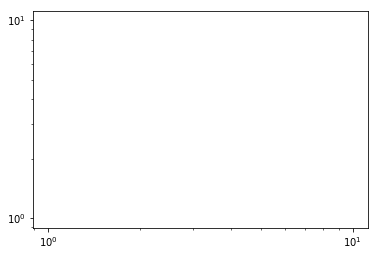

In [120]:

ims1, ims2 = [0], [1]
racut,rbcut = 3.6,4.8 # 4.8, 4.8
n1s, errs = clb.get_lc(fs1, objs1, ims1, ims2, brs, bq, racut=racut, rbcut=rbcut)
ots = plt.loglog(n1s, errs, '-o')
#print( np.max(np.))

In [ ]:
bq = [1,17]
brs = [[0,9],[0,10],[1,6],[1,7],[1,11],[1,12],[2,9],[2,10],[2,13],[2,14] ]
ims1, ims2 = [0], [1]
n1s, errs = get_lc(fs, objs, ims1, ims2, brs, bq)
ots = plt.loglog(n1s, errs, '-o')

In [ ]:
bq = [1,2]
brs = [[0,1],[2,3],[1,2], ]
ims1, ims2 = [0], [1]
n1s, errs = get_lc(fs, objs, ims1, ims2, brs, bq)
ots = plt.loglog(n1s, errs, '-o')

In [ ]:
bq = [1,3]
brs = [[0,2],[2,4],[1,3], ]
ims1, ims2 = [0], [1]
n1s, errs = get_lc(fs, objs, ims1, ims2, brs, bq)
ots = plt.loglog(n1s, errs, '-o')

In [ ]:
bq = [2,5]
brs = [[0,3],[2,5],[1,4], ]
ims1, ims2 = [0], [1]
n1s, errs = get_lc(fs, objs, ims1, ims2, brs, bq)
ots = plt.loglog(n1s, errs, '-o')